# Statistics 4: F-Test and T-Test

One of the most important things in all of science is understanding whether your results are statistically significant. In other words, is the result you are seeing real or simply random noise? This notebook will help you work through these concepts and learn how to calculate this with Python.

First, let's import all the libraries we need. You will notice an additional library, scipy (Scientific Python). We will use the statistical distributions from the scipy.stats library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## T Values and Confidence Intervals

Let's imagine you are in charge of monitoring water quality for the city of Tucson. You are interested in measuring perfluorooctane-sulfonic acid (PFOS) concentration in water for a city over the course of time using an LC/MS assay. The mean concentration of PFOS is 28 ppt. This seems like a low level, but there is thought to be a health risk above 20 ppt.

But, you don't actually know the true mean. You have to infer it from noisy measurement. Let's simulate a series of 4 measurements around this mean with some experimental noise added.

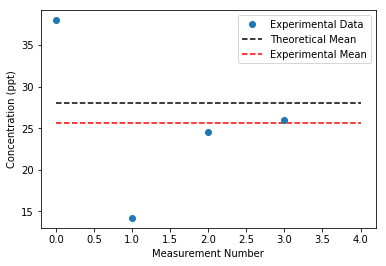

In [2]:
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points

concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation

# Calculate the experimental mean and standard deviation of the sample
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) # Note: we need to add the ddof term to tell it we have lost one degree of freedom

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", label="Experimental Data")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="black", label="Theoretical Mean")
plt.hlines(mean, 0, len(concs), linestyle = "--", color="red", label="Experimental Mean")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

You can see that the experimental mean doesn't perfectly match the theoretical mean. 

Now, we need to calculate the confidence interval for the data. The confidence interval is the mean +/- $\frac{ts}{\sqrt{n}}$. The mean and standard deviation are calculated in the code above. Note, we need to remove one degree of freedom from the standard deviation calculation, so we set the delta degrees of freedom (ddof) parameter in the np.std() function to be 1. 

Now, we need to calculate the $t$ value for the equation. We can do this using the scipy.stats package.

In [3]:
# Function to calculate the t value in Table 4-4 from the confidence level and the degrees of freedom
def calc_t(cl, dof):
    return stats.t.ppf(1- ((100-cl)/2/100), dof)

# Test it
tval = calc_t(95, 3)
print("The t value for a 95% confidence level and 3 degrees of freedom is:", tval)

The t value for a 95% confidence level and 3 degrees of freedom is: 3.18244630528


**Problem 1:** Calculate the 95% confidence interval for the concs data set above.

In [4]:
# Your code here

ci = None #Your answer here
print("The concentration is:", mean, "+/-", ci, " (ppt)")

The concentration is: 25.6566508814 +/- None  (ppt)


**Problem 2:** Calculate the 99% confidence interval for the concs data set above.

In [5]:
# Your code here

ci = None #Your answer here
print("The concentration is:", mean, "+/-", ci, " (ppt)")

The concentration is: 25.6566508814 +/- None  (ppt)


You should see that the 99% confidence interval is larger than the 95% confidence interval.

The 95% confidence interval means that if you were to make the measurement 100 times, the true population mean (in this case 28 ppt) would fall in the interval 95 times on average.

This would take forever to do experimentally but is easy to do with computers. First, we need to learn how to use an "if" statement in Python. If statements are fairly commonsense logical statements. If the stament is true, it will execute the indented code. If the statement is false, it will not execute it. You can combine logical tests with "and" and "or" statements. An "else" statment is executed if the "if" statement is not executed. Take a look at some examples:

In [6]:
if True:
    print("True")
    
if False:
    print("False")
    
if False:
    print("False")
else:
    print("Else True")
    
if 2 < 3: # < is less than
    print("2 < 3")
    
if 3 < 2:
    print("No way dude!")
    
if 2 < 3 and 3 < 4:
    print("2 < 3 and 3 < 4")
    
if 2 < 3 or 2 > 3: # > is greater than
    print("Ok, well at least one was correct")
    
x=2
if x==2: # == is a test for equivalence
    print('x equals 2')
    
if x!=3: # != is a test for not equal
    print("x is not equal to 3")

True
Else True
2 < 3
2 < 3 and 3 < 4
Ok, well at least one was correct
x equals 2
x is not equal to 3


Now, we want to use a for loop (see Statistics 3 notebook) to loop through 100 experiments. Each loop will generate 4 new data points. We will then calculate the mean and confidence interval. Finally, we will test if the true theoretical mean is outside the experimental confidence interval using an if statement. If the theoretical mean is outside the experimental confidence interval, we will plot it as red. If not, we will plot it as green. We will also tally up the number of "bad" measurements. 

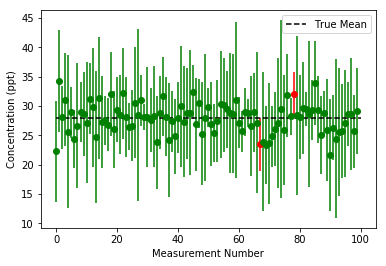

2 out of 100 experiments had a confidence interval that didn't include the true mean.


In [7]:
n_exp = 100  # Set the number of experiments

outliers=0  # Initialize the number of outliers to 0
for i in range(0, n_exp):  # Loop from 0 to n_exp. i isn't used but we need to loop something.
    concs = np.random.normal(mu,sigma, n) #Generates 4 new random points with the same mean and standard deviation
    
    mean = np.mean(concs) # Calculate the mean
    std_dev = np.std(concs, ddof=1) # Calculate the standard deviation
    ci = calc_t(95, n-1) * std_dev / np.sqrt(n) # Calculate the confidence interval
    
    #Test if the true mean, mu, is outside the confidence interval
    if mu > mean + ci or mu < mean - ci:
        outliers = outliers + 1 # If the true mean is outside the confidence interval, add one to the outliers variable
        plt.errorbar(i, mean, yerr=ci, color="red", marker="o") # Make a red plot with error bars on the plot
    else:
        plt.errorbar(i, mean, yerr=ci, color="green", marker="o") # If the true mean is within the CI, make a green dot.

#More plotting commands
plt.hlines(mu, 0, n_exp, linestyle = "--", color="black", label="True Mean")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

#Print the number of outliers
print(outliers, "out of", n_exp, "experiments had a confidence interval that didn't include the true mean.")

Note: you might get exactly 5 of the 100 experiments with confidence intervals that didn't include the mean. Try running it a few more times. Sometimes you will get more or less. This simply reflects the statistical noise, even with 100 measurements.

**Problem 3:** Calculate the number of outliers for **200 iterations** and a **50% confidence level** and generate a plot like the red/green one above (you can copy paste code). It should be close to 100 out of 200. 

In [8]:
# Your Work Here


You will notice the confidence intervals are much smaller for the 50%. If you are willing to sacrifice that you may be wrong 50% of the time, you can report smaller error bars.

## T-Test with a "Known" Value

Ok, now what we understand t values and confidence intervals, let's apply them back to our problem: Is the level of PFOS in the Tucson water supply statistically above the risk threshold of 20 ppt.

Here, we are comparing our measured value with a **known or reference value**. This is the simplest t-test because we just need to see if the reference value is within the confidence interval. If the reference value is within the confidence interval, we can say it is not statistically different. If not, we say they are. We will use a 99% confidence interval here to be highly confident in the results.

The code below calculates the confidence interval for 4 measurements at the 99% level and plots this in relation to the theoretical mean and the risk level (reference value).

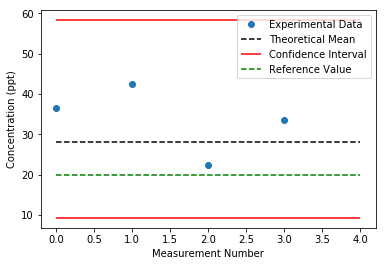

In [9]:
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points

concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation

# Calculate the experimental mean and standard deviation of the sample
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) # Note: we need to add the ddof term to tell it we have lost one degree of freedom
ci = calc_t(99, n-1) * std_dev / np.sqrt(n)

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", label="Experimental Data")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="black", label="Theoretical Mean")
plt.hlines(mean+ci, 0, len(concs), linestyle = "-", color="red", label="Confidence Interval")
plt.hlines(mean-ci, 0, len(concs), linestyle = "-", color="red")
plt.hlines(20, 0, len(concs), linestyle = "--", color="green", label="Reference Value")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

On my computer, the green reference value is within the red 99% confidence interval. (If yours doesn't, just pretend with me or rerun the code a few times to see it for yourself.) Thus, we cannot be totally sure this isn't just random noise. We could lower our confidence interval, but that isn't desirable. If you were the water company and needed to invest millions of dollars to remediate the problem, you want to be very confident that this isn't just a random glitch.

Instead, let's take more measurements.

**Problem 4:** Adjust the code below to achieve a narrower confidence interval such that the green reference value is now outside the confidence interval. You need to change only one parameter, but you must change one. You are not allowed to change the confidence level; it should remain at 99%. You are also not allowed to change mu and sigma. These are fixed properties of the system and measurement. Rerun the code three times in a row and make sure it is statistically significant each time. 

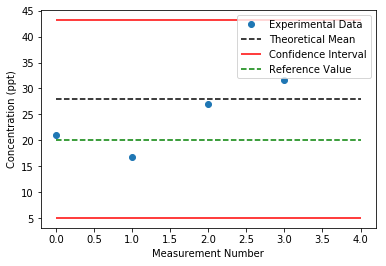

In [10]:
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points

concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation

# Calculate the experimental mean and standard deviation of the sample
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) # Note: we need to add the ddof term to tell it we have lost one degree of freedom
ci = calc_t(99, n-1) * std_dev / np.sqrt(n)

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", label="Experimental Data")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="black", label="Theoretical Mean")
plt.hlines(mean+ci, 0, len(concs), linestyle = "-", color="red", label="Confidence Interval")
plt.hlines(mean-ci, 0, len(concs), linestyle = "-", color="red")
plt.hlines(20, 0, len(concs), linestyle = "--", color="green", label="Reference Value")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

You can see that by increasing the $n$ value (making more measurements), we can get a more confident quantitation and be sure that the PFOS level is above the risk level. We may still see data points below the risk level line, but we are confident that the mean is above the line. 

## Comparing Two Samples with T-Tests and F-Tests

Ok, your boss is finally convinced that you are onto something and that PFOS levels are a concern. She asks you to start testing some different samples across town to see if the levels are different near a factory that uses PFOS. You collect two different samples, the first set the we measured above from the overall water supply and a new set of data from water collected near the factory. 

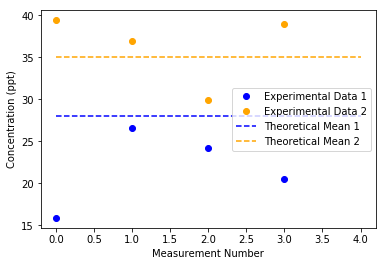

In [11]:
# Data Set 1: The general water supply
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points

concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) 

# Data Set 2: Collected near the factory
mu2 = 35
sigma2 = 6
n2 = 4

concs2 = np.random.normal(mu2,sigma2, n2)
mean2 = np.mean(concs2)
std_dev2 = np.std(concs2, ddof=1) 

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", color="blue", label="Experimental Data 1")
plt.plot(concs2, marker ="o", linestyle=" ", color="orange", label="Experimental Data 2")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="blue", label="Theoretical Mean 1")
plt.hlines(mu2, 0, len(concs2), linestyle = "--", color="orange", label="Theoretical Mean 2")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

Before we can do a t-test to determine if the the levels are statistically higher near the factory, we need to do an F-test to see if the standard deviations are statistically different. We need different statistical tests in either case. 

To do an F-test, we first need to calculate the F value from the standard deviations. 

**Problem 5:** Using equation 4-6 from Harris, $F_{calc} = \frac{s_1^2}{s_2^2}$, calculate the $F_{calc}$ value and compare it with the $F_{table}$ value calculated below. Print the $F_{calc}$ value. Write an "if" statement to decide if your standard deviations are statistically different and print either "Statistically Significant" or "Not Significant". 

In [12]:
cl=99 # A 99% confidence level

# We need to test if the standard deviation is greater for sample 1 or sample 2
# The F values are calculated assuming s1>s2. If this isn't the case, we need to flip the degrees of freedom and std_devs
if std_dev > std_dev2:
    dfn = n # Degrees of Freedom in the numerator (the larger standard deviation)
    dfd = n2 # Degrees of Freedom in the denominator (the smaller standard deviation)
    s1 = std_dev
    s2 = std_dev2
else:
    dfn = n2
    dfd = n
    s1 = std_dev2
    s2 = std_dev

#Calculate the F table value
F_table = stats.f.ppf(q=cl/100, dfn=dfn, dfd=dfd)
print("F_table is:", F_table, "for a confidence level of", cl)


# Your Code Here



F_table is: 15.9770248526 for a confidence level of 99


Most times I run this code, I get a result that they are not statistically significant. Thus, we need to use Equations 4-9a and 4-10a in Harris to calculate the $t$ value. First, we need to calculate the pooled standard deviation: $s_{pooled} = \sqrt{\frac{s_1^2 (n_1 -1) + s_2^2 (n_2 -1)}{n_1 + n_2 - 2}}$. You should see that the $s_{pooled}$ is close to the average of the two standard deviations.

In [13]:
s_pooled = np.sqrt(((n-1)*std_dev**2 + (n2-1)*std_dev2**2)/(n+n2-2))
print("s_1:", s1)
print("s_2:", s2)
print("s_pooled:",s_pooled)

s_1: 4.66962860997
s_2: 4.40206494581
s_pooled: 4.5378192528


Next, we calculate the $t$ value from the equation: $t = \frac{\mid mean_1 - mean_2 \mid}{s_{pooled}} \sqrt{\frac{n_1 n_2}{n_1+n_2}}$

In [14]:
t_calc = np.abs(mean - mean2)/s_pooled * np.sqrt((n*n2)/(n+n2))
print("t_calc:", t_calc)

t_calc: 4.51755673833


Finally, we need to get the t_table from the code above. The degrees of freedom is $n_1 + n_2 -2$ because we need to remove one degree of freedom for each mean measured.

In [15]:
dof = n+n2-2
t_table = calc_t(cl, dof) #cl is 99 from the F-test above and calc_t is the function defined above
print("t_table", t_table)

t_table 3.70742802132


Similar to the F-test, if $t_{calc} < t_{table}$ the results are not significant. Let's put it all together into one block of code:

t_calc: 7.48870625511
t_table 3.70742802132
Statistically Significant


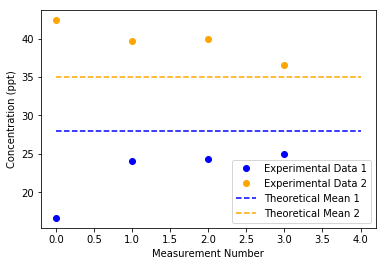

In [16]:
# Data Set 1: The general water supply
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points
concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) 

# Data Set 2: Collected near the factory
mu2 = 35
sigma2 = 6
n2 = 4
concs2 = np.random.normal(mu2,sigma2, n2)
mean2 = np.mean(concs2)
std_dev2 = np.std(concs2, ddof=1) 

# T Test 
s_pooled = np.sqrt(((n-1)*std_dev**2 + (n2-1)*std_dev2**2)/(n+n2-2))
t_calc = np.abs(mean - mean2)/s_pooled * np.sqrt((n*n2)/(n+n2))
print("t_calc:", t_calc)
dof = n+n2-2
t_table = calc_t(cl, dof)
print("t_table", t_table)

if t_calc > t_table:
    print("Statistically Significant")
else:
    print("Not Significant")
    
#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", color="blue", label="Experimental Data 1")
plt.plot(concs2, marker ="o", linestyle=" ", color="orange", label="Experimental Data 2")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="blue", label="Theoretical Mean 1")
plt.hlines(mu2, 0, len(concs2), linestyle = "--", color="orange", label="Theoretical Mean 2")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

Every time I run the code above, the results are not significant. Thus, you would conclude that the factory is not significantly contributing to the PFOS levels. But, you are not convinced. You think sampling the output from the factory directly might help. You return with a fresh batch of samples. Here, you find that the standard deviation is much smaller. 

F_table is: 15.9770248526 for a confidence level of 99
The F Value is: 2295.11637079
Statistically Significant


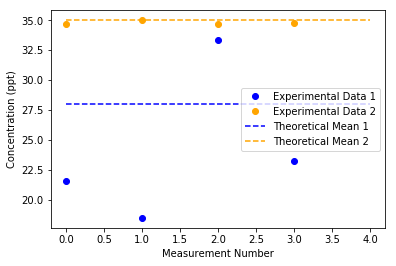

In [17]:
# Data Set 1: The general water supply
mu = 28 #The theoretical mean
sigma = 5 #The theoretical standard deviation
n = 4 #The number of data points
concs = np.random.normal(mu,sigma, n) #Generates 4 random points with this mean and standard deviation
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) 

# Data Set 2: The factory output
mu2 = 35
sigma2 = 0.5 # NOTE: This is changed from the data above.
n2 = 4
concs2 = np.random.normal(mu2,sigma2, n2)
mean2 = np.mean(concs2)
std_dev2 = np.std(concs2, ddof=1) 


cl=99 # A 99% confidence level
if std_dev > std_dev2:
    dfn = n # Degrees of Freedom in the numerator (the larger standard deviation)
    dfd = n2 # Degrees of Freedom in the denominator (the smaller standard deviation)
    s1 = std_dev
    s2 = std_dev2
else:
    dfn = n2
    dfd = n
    s1 = std_dev2
    s2 = std_dev

#Calculate the F table value
F_table = stats.f.ppf(q=cl/100, dfn=dfn, dfd=dfd)
print("F_table is:", F_table, "for a confidence level of", cl)
# Calculate the F calc value
F_calc = s1**2/s2**2
print("The F Value is:", F_calc)
# Compare the F_calc and F_table to determine the significance. 
if F_calc > F_table:
    print("Statistically Significant")
else:
    print("Not Significant")

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", color="blue", label="Experimental Data 1")
plt.plot(concs2, marker ="o", linestyle=" ", color="orange", label="Experimental Data 2")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="blue", label="Theoretical Mean 1")
plt.hlines(mu2, 0, len(concs2), linestyle = "--", color="orange", label="Theoretical Mean 2")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()

"Excellent work!" Your boss is excited by the more precise sampling, but you still need to perform the t-test. Because the standard deviations are statistically different, we need to use a different way to calculate t, Equations 4-9b:

$t = \frac{\mid mean_1 - mean_2 \mid}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$

You also need to calculate the degrees of freedom differently based on Equation 4-10b:

$ dof = \frac{(s_1^2/n_1 + s_2^2/n_2)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}$

Because I am a kind professor, I've calculated the degress of freedom for you below.

In [18]:
s1n1 = s1**2/n
s2n2 = s2**2/n2
dof = round((s1n1 + s2n2)**2 / ((s1n1**2/(n-1)) + (s2n2**2/(n2-1))))
print("Degrees of Freedom:", dof)

Degrees of Freedom: 3.0


**Problem 6:** Use the equation 4-9b to determine if the results are significantly different. Write an "if" statement to decide if your standard deviations are statistically different and print either "Statistically Significant" or "Not Significant". 

In [19]:
# Your Code Here


Bummer! It's still not statistically significant (probably). Clearly, your sampling is better, but the standard deviation of the initial result is a problem. You suspect that matrix effects in the general water supply are the problem and redesign your LC/MS method to have an improved separation. This reduces the standard deviation of your measurements. 

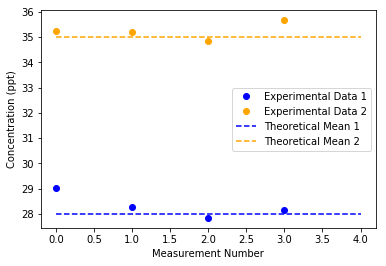

In [20]:
# Data Set 1: The improved data from the general water supply
mu = 28
sigma = 1 # NOTE: This has changed from above.
n = 4
concs = np.random.normal(mu,sigma, n) 
mean = np.mean(concs)
std_dev = np.std(concs, ddof=1) 

# Data Set 2: The improved data from the factory output
mu2 = 35
sigma2 = 0.5
n2 = 4
concs2 = np.random.normal(mu2,sigma2, n2)
mean2 = np.mean(concs2)
std_dev2 = np.std(concs2, ddof=1) 

#Plot the results
plt.plot(concs, marker ="o", linestyle=" ", color="blue", label="Experimental Data 1")
plt.plot(concs2, marker ="o", linestyle=" ", color="orange", label="Experimental Data 2")
plt.hlines(mu, 0, len(concs), linestyle = "--", color="blue", label="Theoretical Mean 1")
plt.hlines(mu2, 0, len(concs2), linestyle = "--", color="orange", label="Theoretical Mean 2")
plt.legend()
plt.ylabel("Concentration (ppt)")
plt.xlabel("Measurement Number")
plt.show()


**Problem 7:** Use a combination of F-test and t-tests to determine whether the two data sets in the code directly above are statistically different.

In [21]:
# Your code here


## Paired t-tests: Comparing two measurements of the same sample

Ok. Your boss agrees that these are troubling and need to be monitored more closely. She invests in buying some new analytical instruments to handle the extra measurements that will need to be done. You need to compare these new instruments with the old ones. You make two sets of measurements. Both are on the same sets of samples. In other words, you measure sample 1 on both the old instrument and the new instrument. The difference from above is that this is the same sample in each case. You generate 2 data sets:

In [22]:
# Data Set 1: From the old instrument
mu = 28
sigma = 1 
n = 4
concs = np.random.normal(mu,sigma, n) 

# Data Set 2: From the new instrument
mu2 = 28
sigma2 = 0.5
concs2 = np.random.normal(mu2,sigma2, n) #Note: there is no n2 parameter here. They have to be the same length.

Here, we need to use Equations 4-11 and 4-12 in the textbook. These rely on calculating the mean ($mean_d$) and standard devation ($s_d$) of the **differences between the same sample in each data set**. 

In [23]:
# Calculate the differences between the two measurements
d = concs - concs2

# Calculate the mean and standard deviation of the differences.
meand = np.mean(d)
stdd = np.std(d, ddof=1)

The equation for $t_{calc}$ here is 4-12: $t_{calc} = \frac{\mid mean_d \mid}{s_d} \sqrt{n}$

**Problem 8:** Calculate $t_{calc}$ and $t_{table}$ for this measurement. Print whether it is statistically significant or not. Hint: the degrees of freedom will be $n-1$. 

In [24]:
# Your code here


Hooray! You have validated that the new instrument is as good as the old, and the results are not statistically different. You are now set to run more vigorous testing for this potentially dangerous molecule in the Tucson water system. Isn't analytical chemistry the coolest!?!

In [25]:
print("Yes, Prof. Marty, analytical chemistry is definitely the coolest!")

Yes, Prof. Marty, analytical chemistry is definitely the coolest!
